In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Kobe Bryant  shot selection

Cсылка на соревнование: https://www.kaggle.com/c/kobe-bryant-shot-selection

Goal: Fun and education

Using 20 years of data on Kobe's swishes and misses, can you predict which shots will find the bottom of the net? This competition is well suited for practicing classification basics, feature engineering, and time series analysis. Practice got Kobe an eight-figure contract and 5 championship rings. What will it get you?

This data contains the location and circumstances of every field goal attempted by Kobe Bryant took during his 20-year career. Your task is to predict whether the basket went in (shot_made_flag).

We have removed 5000 of the shot_made_flags (represented as missing values in the csv file). These are the test set shots for which you must submit a prediction. You are provided a sample submission file with the correct shot_ids needed for a valid prediction.

In [2]:
df = pd.read_csv('kobe.csv')

In [3]:
df.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [4]:
target = 'shot_made_flag'

**Задания:**

1. Провести анализ данных. Много хороших примеров анализа можно посмотреть здесь https://www.kaggle.com/c/kobe-bryant-shot-selection/kernels
2. Подготовить фичи для обучения модели - нагенерить признаков, обработать пропущенные значения, проверить на возможные выбросы, обработать категориальные признаки и др.
3. Обучить линейную модель, Lasso, Ridge (с встроеной регуляризацией) на тех же признаках - построить сравнительную таблицу или график коэффициентов, сделать заключения о том, как меняется величина коэффициентов, какие зануляются. 

**Дополнительно**
4. Сравнить результаты на тестовом наборе данных - сделать train_test_split в самом начале, подготовить переменные, сравнить результаты работы классификаторов (те же 3), метрика ROC AUC
5. Построить PCA на подготовленных признаках, посмотреть, какие компоненты составляют наибольшую часть дисперсии целевой переменной

In [5]:
df.shape

(30697, 25)

## Анализ данных

In [6]:
df.describe()

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,team_id,shot_id
count,30697.000000,3.069700e+04,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,25697.000000,3.069700e+04,30697.000000
mean,249.190800,2.476407e+07,33.953192,7.110499,91.107535,-118.262690,4.885624,2.519432,0.146562,28.365085,13.437437,0.446161,1.610613e+09,15349.000000
std,150.003712,7.755175e+06,0.087791,110.124578,87.791361,0.110125,3.449897,1.153665,0.353674,17.478949,9.374189,0.497103,0.000000e+00,8861.604943
min,2.000000,2.000001e+07,33.253300,-250.000000,-44.000000,-118.519800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.610613e+09,1.000000
25%,110.000000,2.050008e+07,33.884300,-68.000000,4.000000,-118.337800,2.000000,1.000000,0.000000,13.000000,5.000000,0.000000,1.610613e+09,7675.000000
50%,253.000000,2.090035e+07,33.970300,0.000000,74.000000,-118.269800,5.000000,3.000000,0.000000,28.000000,15.000000,0.000000,1.610613e+09,15349.000000
75%,368.000000,2.960047e+07,34.040300,95.000000,160.000000,-118.174800,8.000000,3.000000,0.000000,43.000000,21.000000,1.000000,1.610613e+09,23023.000000
max,659.000000,4.990009e+07,34.088300,248.000000,791.000000,-118.021800,11.000000,7.000000,1.000000,59.000000,79.000000,1.000000,1.610613e+09,30697.000000


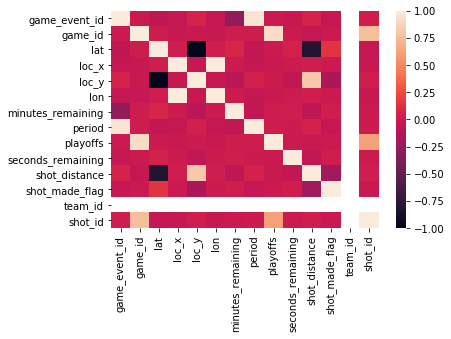

In [7]:
# тепловая карта корреляций наших признаков
import seaborn as sns
corr =df.corr()
sns.heatmap(corr)

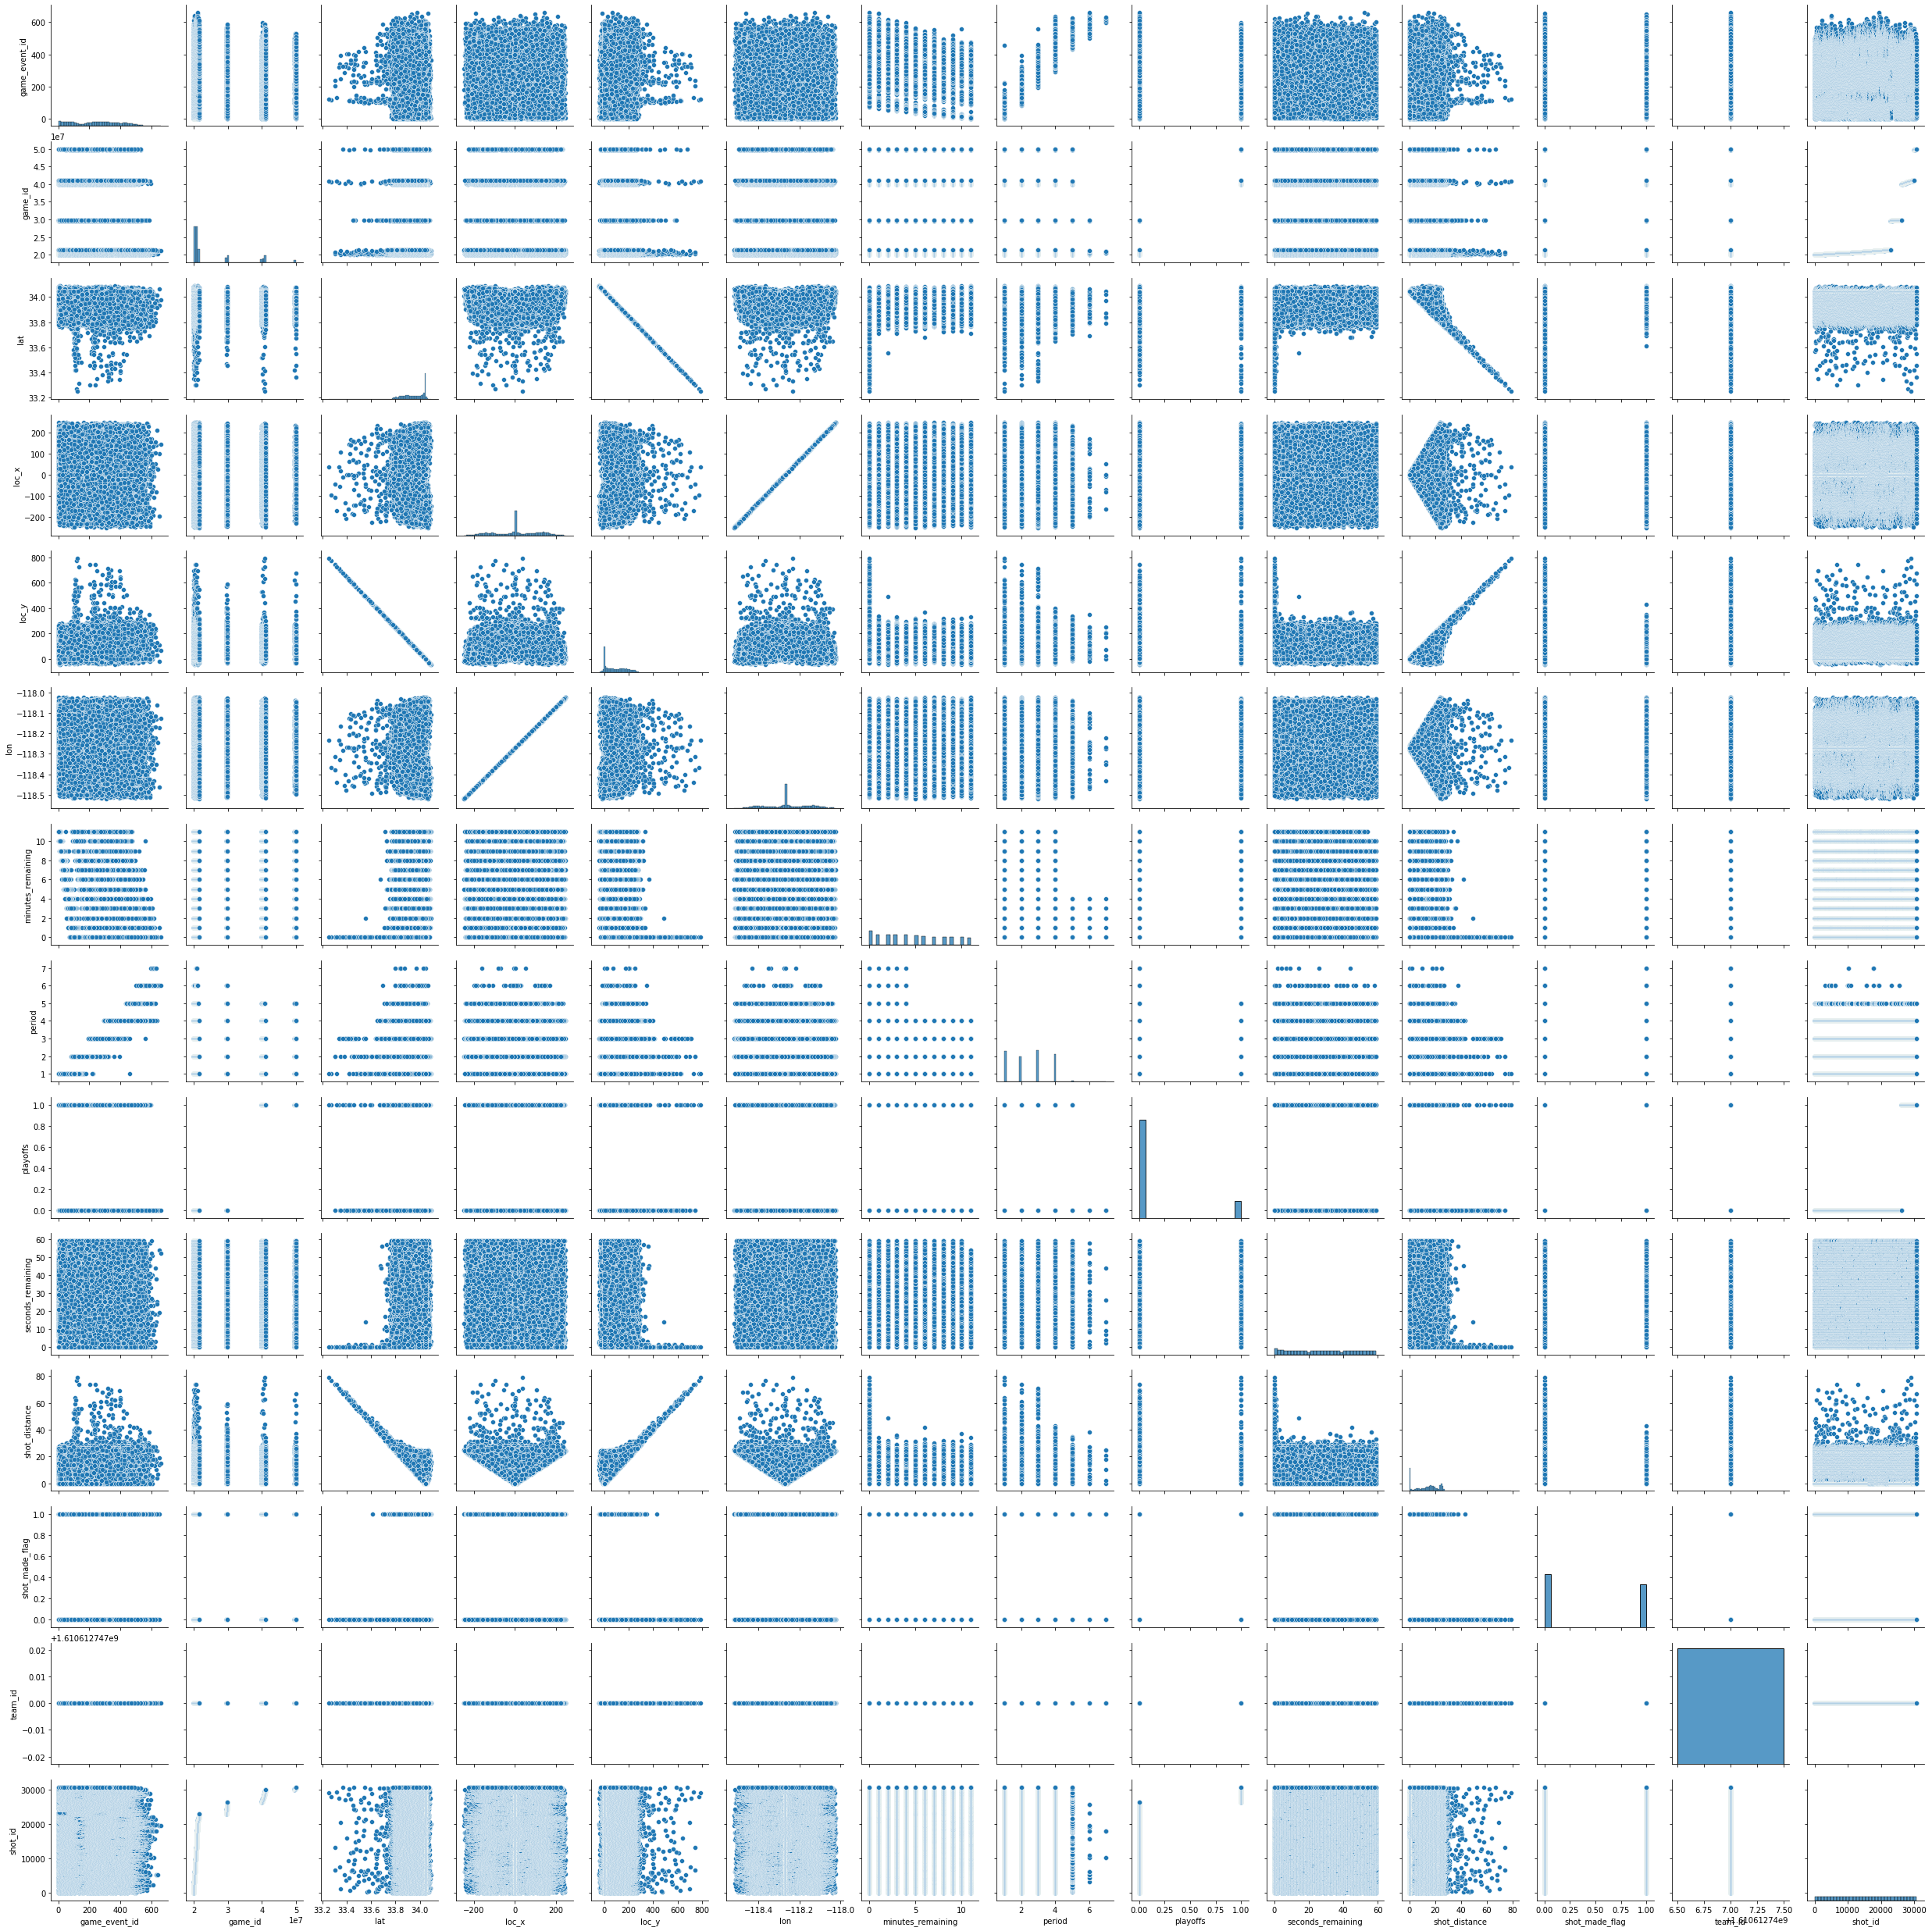

In [8]:
sns.pairplot(df)

Видимых выбросов в данных нет, а так же есть прямые линейные зависимости между фичами

{'whiskers': [<matplotlib.lines.Line2D at 0x7f19542f1b10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1954410250>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f19542f1b50>],
 'medians': [<matplotlib.lines.Line2D at 0x7f19542971d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1954297d90>],
 'means': []}

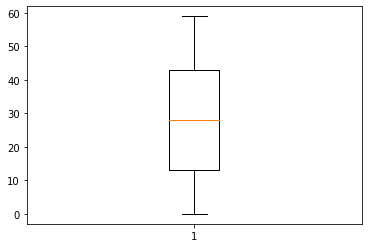

In [9]:
plt.boxplot(df['seconds_remaining'])

посмотрим на кол-во попаданий в корзину(нашу целевую переменную)

In [10]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


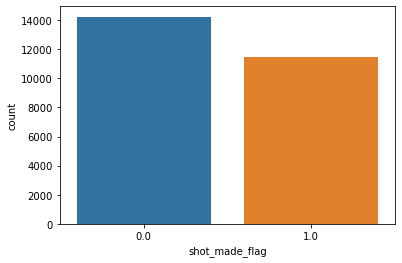

In [11]:
sns.countplot(df.shot_made_flag)

In [12]:
df.columns

Index(['action_type', 'combined_shot_type', 'game_event_id', 'game_id', 'lat',
       'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period', 'playoffs',
       'season', 'seconds_remaining', 'shot_distance', 'shot_made_flag',
       'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
       'team_id', 'team_name', 'game_date', 'matchup', 'opponent', 'shot_id'],
      dtype='object')

Из приведенного выше описания необходимо проверить следующие функции:

- Числовые характеристики - lat, loc_x, loc_y, lon, minutes_remaining, seconds_remaining, shot_distance.
- Категориальные особенности - action_type, combined_shot_type, period, playoffs, season, shot_type, shot_zone_area, shot_zone_basic, shot_zone_range

Исследуем влияние функций на целевую переменную одну за другой.

#### числовые признаки

loc_x и loc_y - точки, из которых Коби делал выстрелы

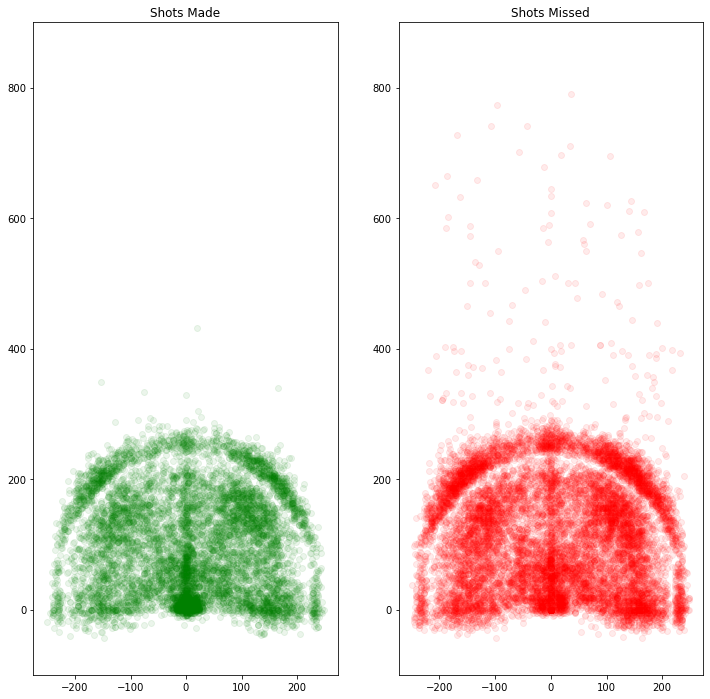

In [13]:
plt.figure(figsize=(12,12))
plt.subplot(121)
plt.scatter(df.loc[df.shot_made_flag==1, 'loc_x'], df.loc[df.shot_made_flag==1, 'loc_y'], alpha=0.08, c='g')
plt.title('Shots Made')
plt.ylim(-100, 900)
plt.subplot(122)
plt.scatter(df.loc[df.shot_made_flag==0, 'loc_x'], df.loc[df.shot_made_flag==0, 'loc_y'], alpha=0.08, c='r')
plt.title('Shots Missed')
plt.ylim(-100, 900)
plt.show()

Очевидно, что расстояние имеет значение, много промахов из далекой корзины. В соответствии с интуицией, удары, которые он делает из-под корзины, имеют более высокую вероятность успеха. Также количество промахов больше из зоны внешнего кольца. Но есть странность, у обоих много снимков с 0,0. Давайте проверим счет для лучшего понимания.

In [14]:
c= df.loc[(df.loc_x==0) & (df.loc_y==0)]

c.shot_made_flag.value_counts()

1.0    2696
0.0    1625
Name: shot_made_flag, dtype: int64

Это нелогично, но он пропускает около 40% бросков, которые он делает прямо из-под корзины.

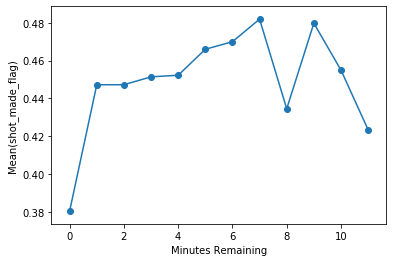

In [15]:
c = df.groupby('minutes_remaining')['shot_made_flag'].mean()
plt.plot(c.index, c.values)
plt.xlabel('Minutes Remaining')
plt.ylabel('Mean(shot_made_flag)')
plt.scatter(c.index, c.values)
plt.show()

 В последнюю минуту происходит резкое падение среднего выстрела

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


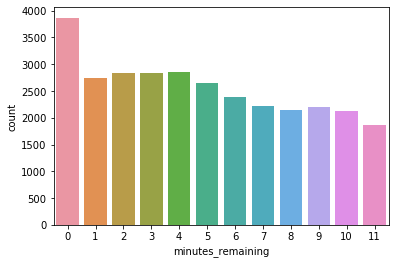

In [16]:
sns.countplot(df.minutes_remaining)

В последнюю секунду делается много попыток.

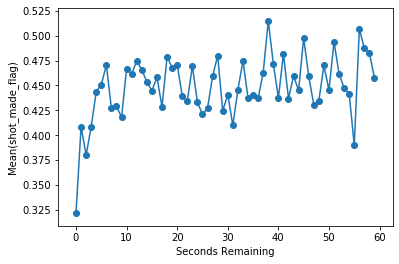

In [17]:
c = df.groupby('seconds_remaining')['shot_made_flag'].mean()
plt.plot(c.index, c.values)
plt.xlabel('Seconds Remaining')
plt.ylabel('Mean(shot_made_flag)')
plt.scatter(c.index, c.values)
plt.show()

Интересно отметить, что его результативность внезапно снижается в последние 3 секунды игры.

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


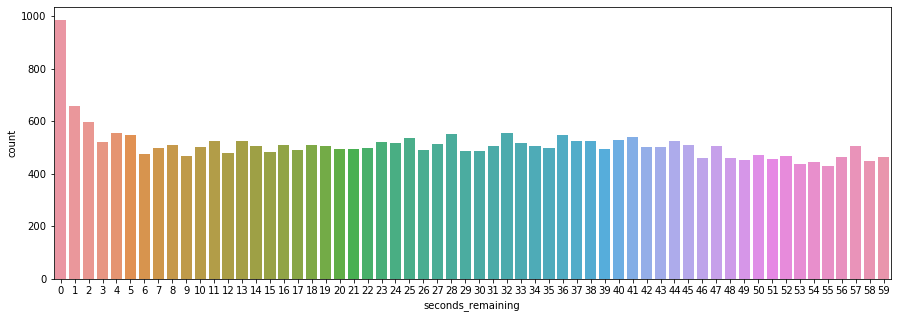

In [18]:
plt.figure(figsize=(15,5))
sns.countplot(df.seconds_remaining)

в последнюю секунду делается много попыток

Shot Distance

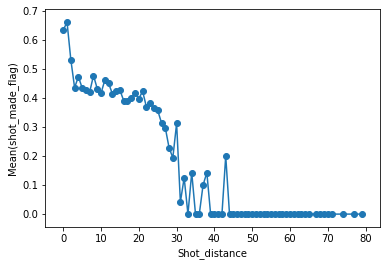

In [19]:
c = df.groupby('shot_distance')['shot_made_flag'].mean()
plt.plot(c.index, c.values)
plt.xlabel('Shot_distance')
plt.ylabel('Mean(shot_made_flag)')
plt.scatter(c.index, c.values)
plt.show()

Очень интуитивно понятно. По мере увеличения расстояния точность уменьшается. Особенность важности для предсказания.

##### категориальные признаки

In [20]:
def color_generator(num_colors):
    """Функция для генирации случайного цвета"""
    colors = []
    for i in range(num_colors):
        colors.append((np.random.rand(), np.random.rand(), np.random.rand()))
    return colors

In [21]:
colors = color_generator(100)

In [22]:
def plot_zone_wise(zone_name):
    """для построения точек zone_wise и проверки их среднего значения целевой переменной"""
    c_mean = df.groupby(zone_name)['shot_made_flag'].mean()
    plt.figure(figsize=(15,15))
    for i, area in enumerate(df[zone_name].unique()):
        plt.subplot(121)
        c = df.loc[(df[zone_name]==area)]
        plt.scatter(c.loc_x, c.loc_y,alpha=0.5 ,c=colors[i])
        plt.text(c.loc_x.mean(), c.loc_y.quantile(0.80), '%0.3f'%(c_mean[area]),size=15, bbox=dict(facecolor='red', alpha=0.5))
        plt.ylim(-100, 900)
    plt.legend(df[zone_name].unique())
    plt.title(zone_name)
    plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a

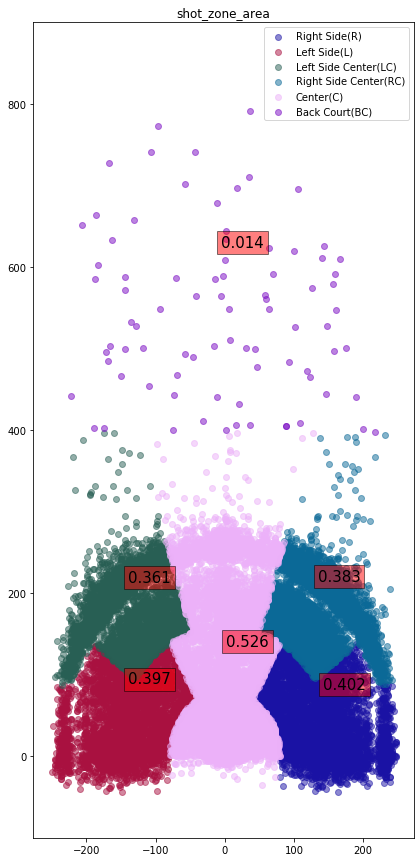

In [23]:
plot_zone_wise('shot_zone_area')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a

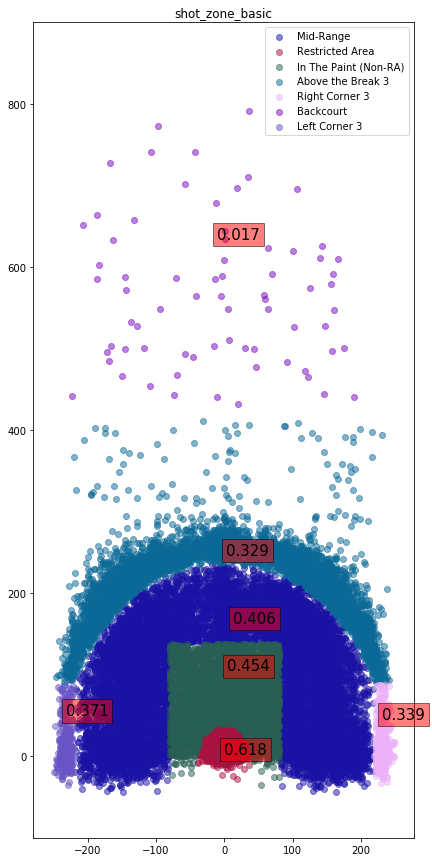

In [24]:
plot_zone_wise('shot_zone_basic')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a

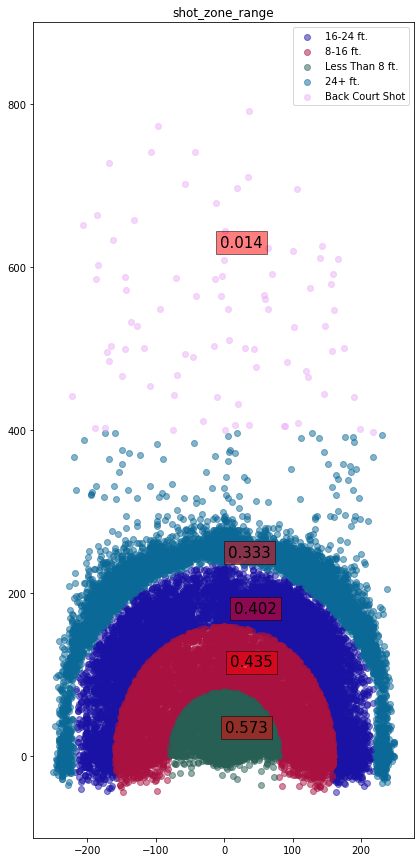

In [25]:
plot_zone_wise('shot_zone_range')

period

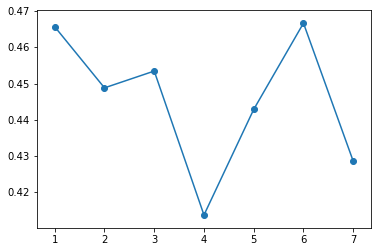

In [26]:
c = df.groupby('period')['shot_made_flag'].mean()
plt.plot(c.index, c.values)
plt.scatter(c.index, c.values)
plt.show()

Playoffs

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


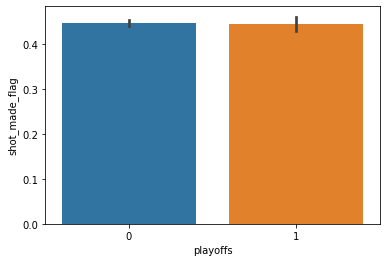

In [27]:
sns.barplot('playoffs', 'shot_made_flag', data=df)

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


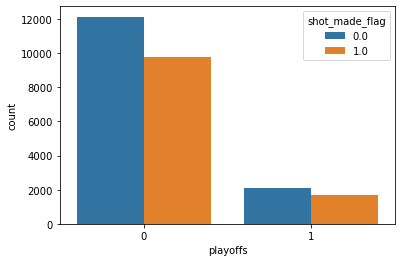

In [28]:
sns.countplot('playoffs', hue ='shot_made_flag', data=df)

season

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


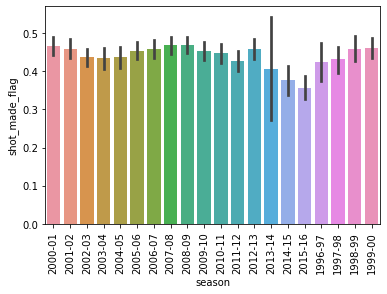

In [29]:
sns.barplot('season', 'shot_made_flag', data=df)
plt.xticks(rotation='vertical')
plt.show()

Его игра почти стабильна, за исключением нескольких сезонов.

Shot_type

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


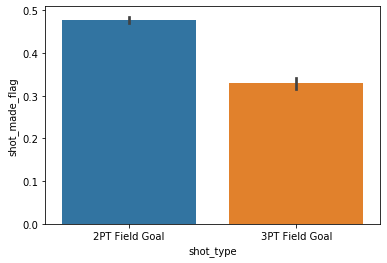

In [30]:
sns.barplot(df.shot_type, df.shot_made_flag)

Combined_shot_type

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


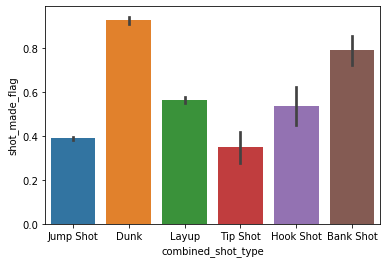

In [31]:
sns.barplot(df.combined_shot_type, df.shot_made_flag)

Комбинированный тип выстрела имеет огромное влияние на результативность выстрела. Данк имеет самый высокий уровень успеха, после которого следует банк шот.

Action Type

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


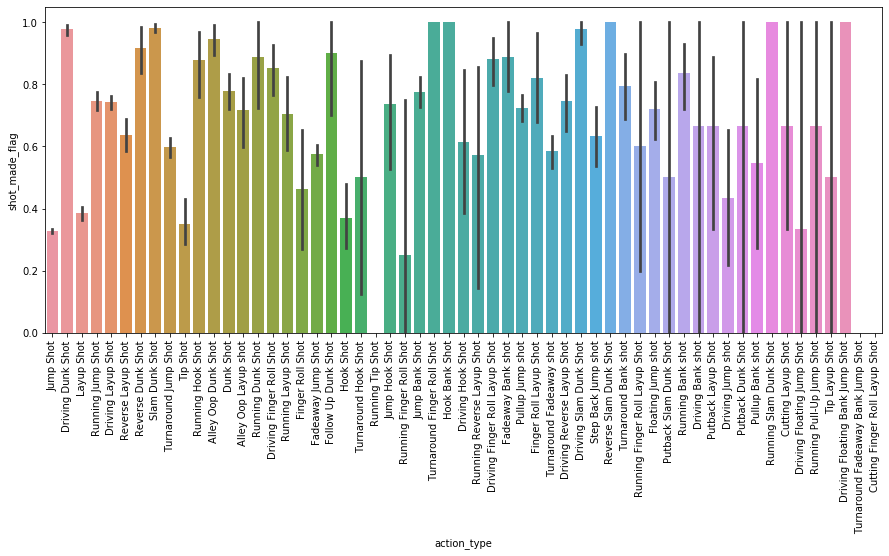

In [32]:
plt.figure(figsize=(15,6))
sns.barplot('action_type', 'shot_made_flag', data=df)
plt.xticks(rotation='vertical')
plt.show()

Итак, это типы выстрелов. И, как мы видим, они имеют огромное влияние на точность. Также в каждом кадре есть специализации. И каждое добавленное действие могло повлиять на успех выстрела. Так что подсчет каждого действия как отдельного может быть полезным.

## Генирация признаков

In [33]:
# minutes_remaining и seconds_remaining объединим вместе
df['remaining_time'] = df['minutes_remaining'] * 60 + df['seconds_remaining']

In [34]:
# season состоит из 2ух частей: года сезона и идентификатора сезона. Здесь нам нужен только идентификатор сезона
df['season'] = df['season'].apply(lambda x: int(x.split('-')[1]) )
df['season'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 97,
       98, 99,  0])

Удалим некоторые переменные:
- team_id и team_name - по сути одно и тоже
- opponent , matchup - также одна и та же информация
- loc_x, loc_y - широта и долгота, зон для броска будет достаточно
- shot_distance пропорционально dist, и в этом нет необходимости

In [35]:
df.columns

Index(['action_type', 'combined_shot_type', 'game_event_id', 'game_id', 'lat',
       'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period', 'playoffs',
       'season', 'seconds_remaining', 'shot_distance', 'shot_made_flag',
       'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
       'team_id', 'team_name', 'game_date', 'matchup', 'opponent', 'shot_id',
       'remaining_time'],
      dtype='object')

In [36]:
#удаление
drops = ['shot_id', 'team_id', 'team_name', 'seconds_remaining', 'minutes_remaining', 'matchup', 'shot_distance', 'loc_x', 'loc_y', 'game_event_id', 'game_id', 'game_date']
for drop in drops:
    df = df.drop(drop, 1)

In [37]:
df.head()

,action_type,combined_shot_type,lat,lon,period,playoffs,season,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,opponent,remaining_time
0,Jump Shot,Jump Shot,33.9723,-118.1028,1,0,1,NaN,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,POR,627
1,Jump Shot,Jump Shot,34.0443,-118.4268,1,0,1,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,POR,622
2,Jump Shot,Jump Shot,33.9093,-118.3708,1,0,1,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,POR,465
3,Jump Shot,Jump Shot,33.8693,-118.1318,1,0,1,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,POR,412
4,Driving Dunk Shot,Dunk,34.0443,-118.2698,2,0,1,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,POR,379


In [38]:
# переведем наши категориальные признауи в числовые
categorical_vars = ['action_type', 'combined_shot_type', 'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range', 'opponent', 'period', 'season']
for var in categorical_vars:
    df= pd.concat([df, pd.get_dummies(df[var], prefix=var)], 1)
    df = df.drop(var, 1)

In [39]:
df.head()

,lat,lon,playoffs,shot_made_flag,remaining_time,action_type_Alley Oop Dunk Shot,action_type_Alley Oop Layup shot,action_type_Cutting Finger Roll Layup Shot,action_type_Cutting Layup Shot,action_type_Driving Bank shot,...,season_10,season_11,season_12,season_13,season_14,season_15,season_16,season_97,season_98,season_99
0,33.9723,-118.1028,0,NaN,627,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,34.0443,-118.4268,0,0.0,622,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,33.9093,-118.3708,0,1.0,465,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,33.8693,-118.1318,0,0.0,412,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,34.0443,-118.2698,0,1.0,379,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Построение модели

In [40]:
df_test = df.loc[df.shot_made_flag.isnull(), :]
df_test.index = range(len(df_test))

df.dropna(inplace=True)

df.index =  range(len(df))

In [41]:
print(df.columns)

Index(['lat', 'lon', 'playoffs', 'shot_made_flag', 'remaining_time',
       'action_type_Alley Oop Dunk Shot', 'action_type_Alley Oop Layup shot',
       'action_type_Cutting Finger Roll Layup Shot',
       'action_type_Cutting Layup Shot', 'action_type_Driving Bank shot',
       ...
       'season_10', 'season_11', 'season_12', 'season_13', 'season_14',
       'season_15', 'season_16', 'season_97', 'season_98', 'season_99'],
      dtype='object', length=148)


In [42]:
y = df.shot_made_flag
X = df.drop(['shot_made_flag'], 1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1923)

In [43]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X_train, y_train)
for i in range(len(df.columns)-1):
      print(f'{df.columns[i]}\t- {model.feature_importances_[i]:.4f}')

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method

lat	- 0.0717
lon	- 0.0653
playoffs	- 0.0191
shot_made_flag	- 0.1112
remaining_time	- 0.0002
action_type_Alley Oop Dunk Shot	- 0.0008
action_type_Alley Oop Layup shot	- 0.0000
action_type_Cutting Finger Roll Layup Shot	- 0.0001
action_type_Cutting Layup Shot	- 0.0000
action_type_Driving Bank shot	- 0.0001
action_type_Driving Dunk Shot	- 0.0003
action_type_Driving Finger Roll Layup Shot	- 0.0004
action_type_Driving Finger Roll Shot	- 0.0000
action_type_Driving Floating Bank Jump Shot	- 0.0000
action_type_Driving Floating Jump Shot	- 0.0000
action_type_Driving Hook Shot	- 0.0005
action_type_Driving Jump shot	- 0.0014
action_type_Driving Layup Shot	- 0.0010
action_type_Driving Reverse Layup Shot	- 0.0000
action_type_Driving Slam Dunk Shot	- 0.0011
action_type_Dunk Shot	- 0.0006
action_type_Fadeaway Bank shot	- 0.0021
action_type_Fadeaway Jump Shot	- 0.0002
action_type_Finger Roll Layup Shot	- 0.0003
action_type_Finger Roll Shot	- 0.0006
action_type_Floating Jump shot	- 0.0000
action_type_F

In [44]:
model.score(X_test, y_test)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/ensemble/base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


-0.10724578449265842

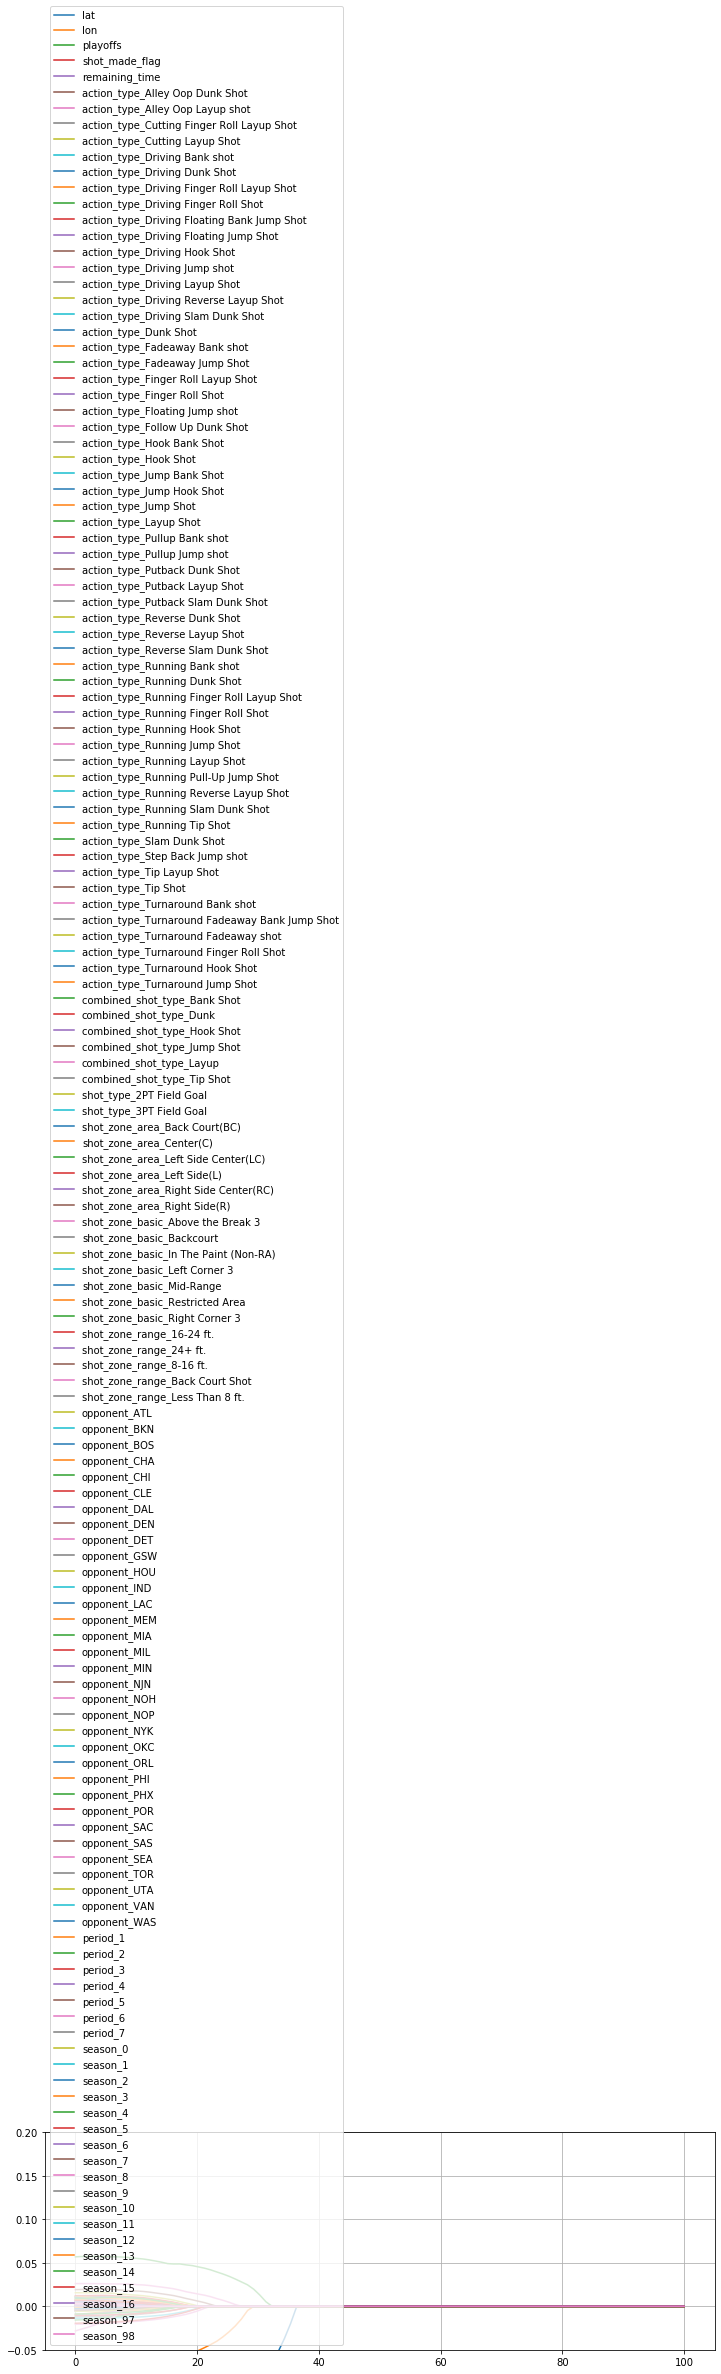

In [45]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import  Lasso
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

X_sc = StandardScaler().fit_transform(X)
lg_l,pred_l = [], []

list_l=list(2**np.linspace(-10,10,100))

for i in range(len(list_l)):
    m_l = Lasso(alpha=list_l[i]).fit(X_sc, y)
    lg_l.append(m_l)
    pred_l.append(m_l.coef_)

plt.figure(figsize=[12,4])
x_l = np.linspace(0,len(pred_l),len(pred_l))
for i in np.vstack(pred_l).T:
    plt.plot(x_l,np.sign(i)*np.abs(i)) 
plt.ylim(-0.05,0.2)  
plt.legend(df.columns)      
plt.grid() 

In [46]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.0)
clf.fit(X_train, y_train).score(X_test, y_test)

0.14295733724812099

### pca

Сократим наши фичи с помощью pca, т к работа нашей модели очень низкая

In [47]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 10)
XPCAreduced = pca.fit_transform(np.transpose(X))

In [51]:
pca.explained_variance_ratio_

array([9.74253880e-01, 2.57071425e-02, 7.28592813e-06, 4.72004739e-06,
       2.08445222e-06, 1.65351434e-06, 1.50922714e-06, 1.39034210e-06,
       1.38036810e-06, 8.85119754e-07])

In [52]:
pca.singular_values_

array([6.35284818e+04, 1.03195155e+04, 1.73730011e+02, 1.39831683e+02,
       9.29241028e+01, 8.27630312e+01, 7.90696303e+01, 7.58915184e+01,
       7.56188141e+01, 6.05526873e+01])

In [61]:
pca.fit(X_train, y_train)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [62]:
pca.score(X_test, y_test)

58.14771619859443

Точность нашей модели повысилась, попробуем повысить кол-во признаков

In [74]:
pca2 = PCA(n_components = 14)
XPCAreduced2 = pca2.fit_transform(np.transpose(X))

In [75]:
pca2.fit(X_train, y_train).score(X_test, y_test)

63.986102274155115